In [1]:
!pip install pandas matplotlib keras tensorflow librosa

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'  # or change if in subfolder
extract_path = '/content/EmotionData'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/EmotionData'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [7]:
len(paths)

2800

In [8]:
paths[:5]

['/content/EmotionData/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_tape_angry.wav',
 '/content/EmotionData/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_judge_angry.wav',
 '/content/EmotionData/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_red_angry.wav',
 '/content/EmotionData/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_laud_angry.wav',
 '/content/EmotionData/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_tip_angry.wav']

In [9]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/EmotionData/tess toronto emotional sp...,angry
1,/content/EmotionData/tess toronto emotional sp...,angry
2,/content/EmotionData/tess toronto emotional sp...,angry
3,/content/EmotionData/tess toronto emotional sp...,angry
4,/content/EmotionData/tess toronto emotional sp...,angry


In [11]:
df['label'].value_counts()

,count
label,
angry,400
fear,400
ps,400
sad,400
neutral,400
disgust,400
happy,400


<Axes: xlabel='label', ylabel='count'>

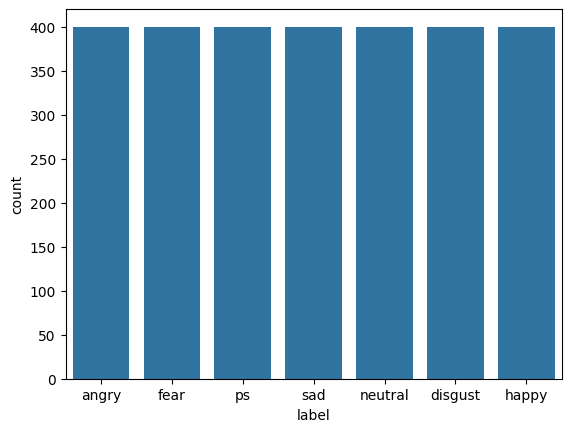

In [12]:
sns.countplot(data=df, x='label')

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

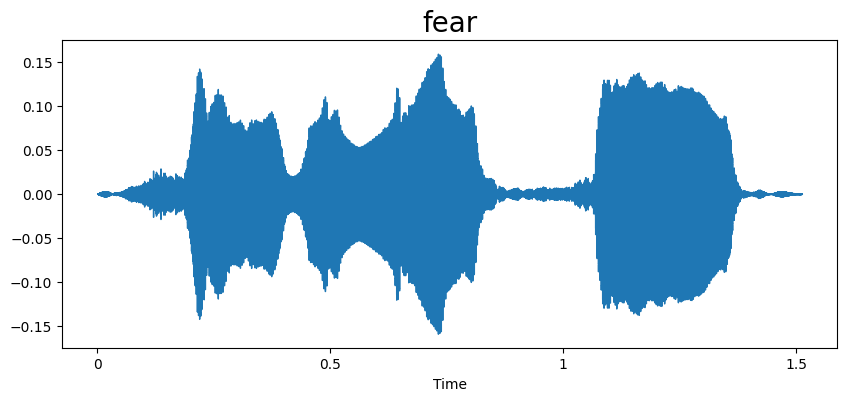

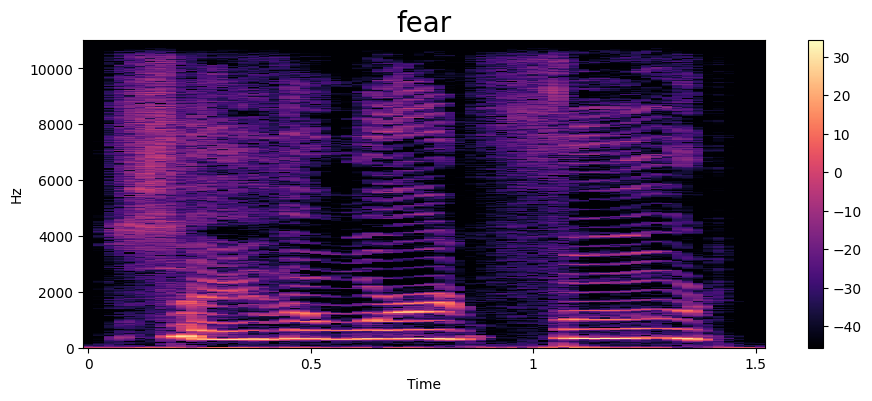

In [14]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

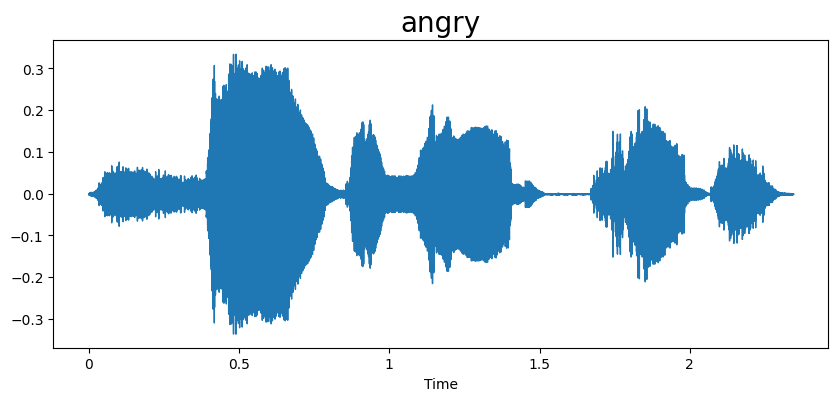

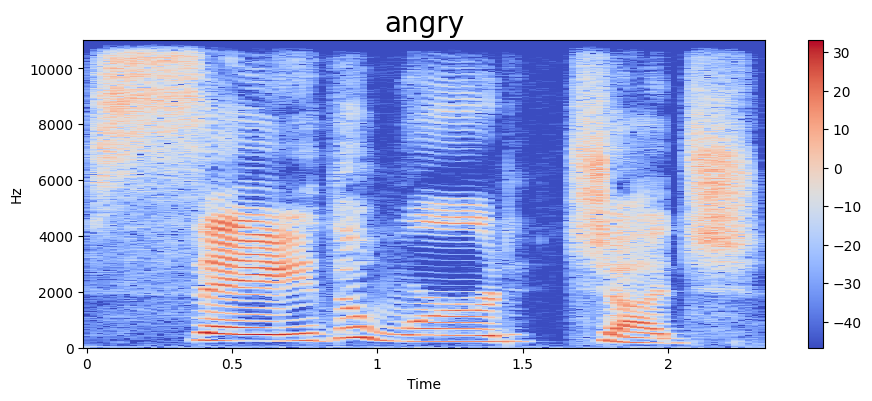

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

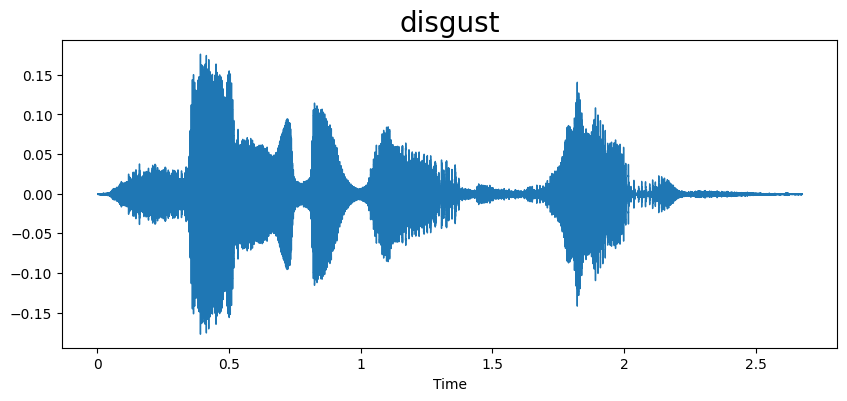

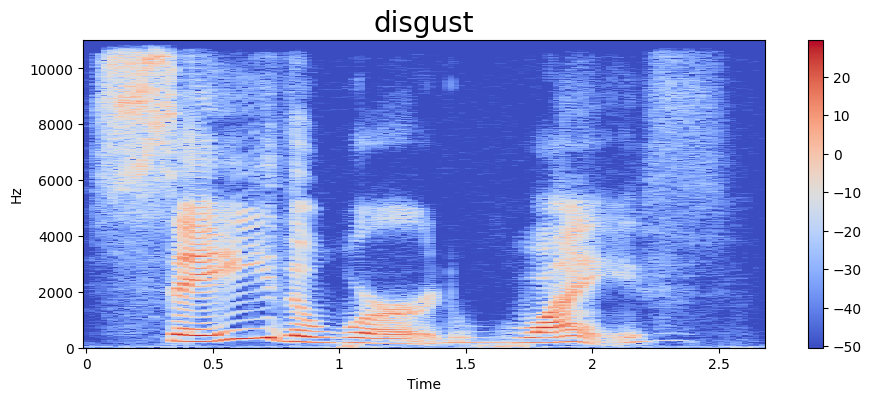

In [16]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

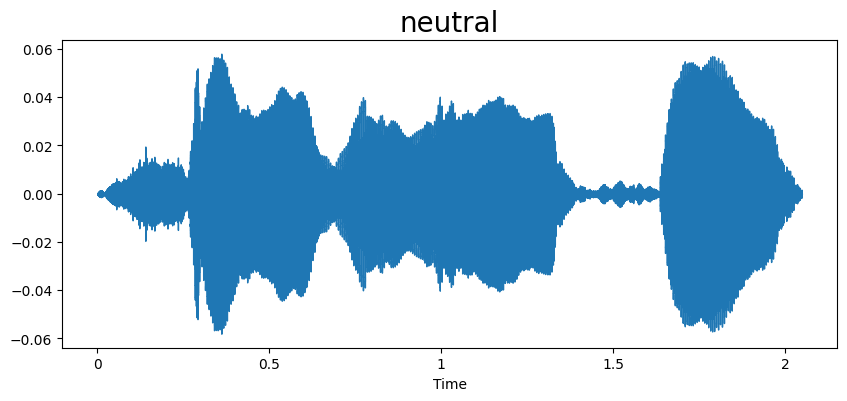

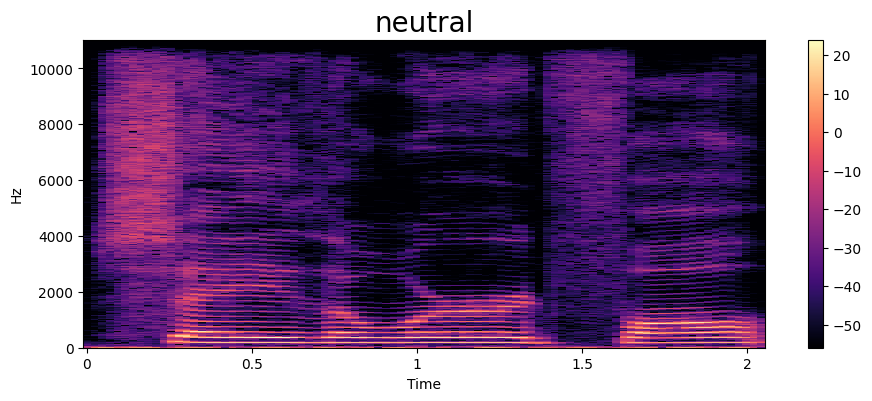

In [17]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

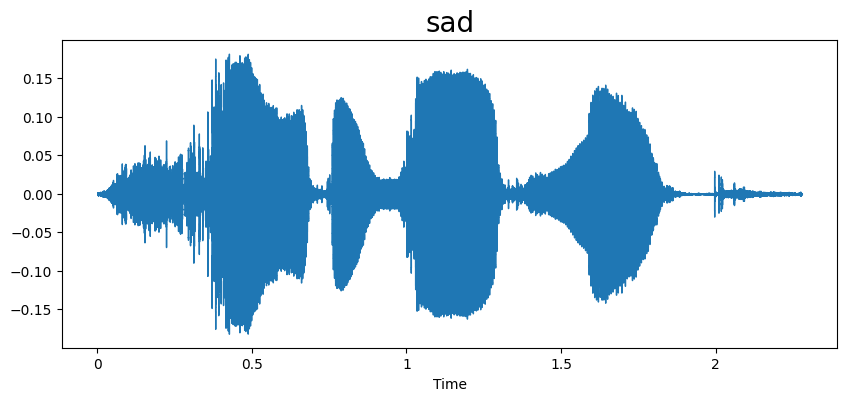

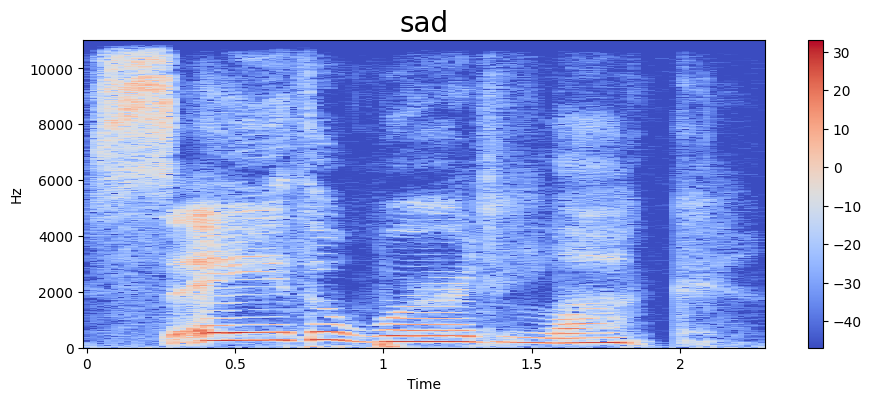

In [18]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

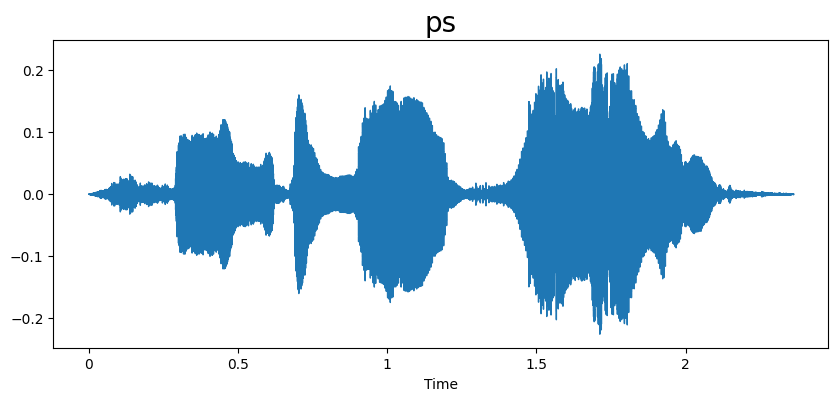

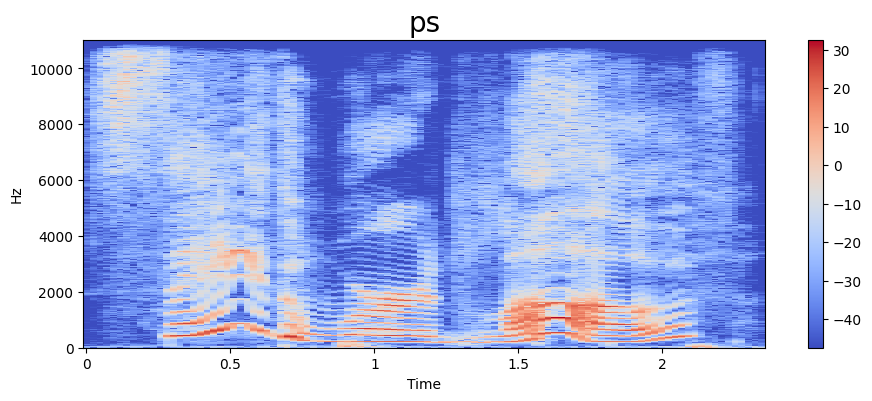

In [19]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

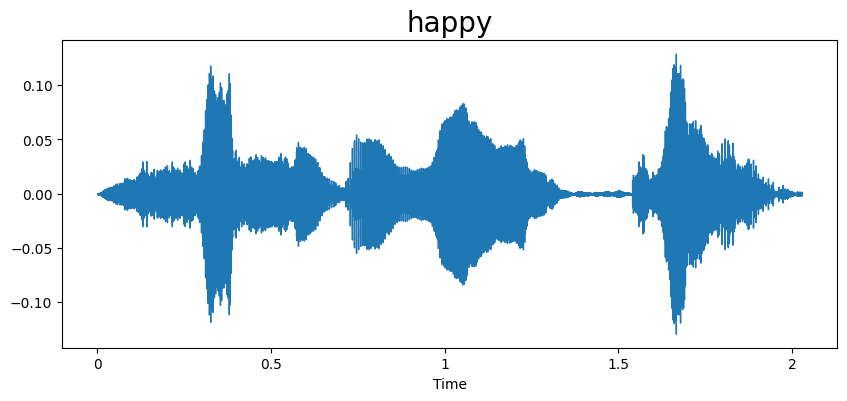

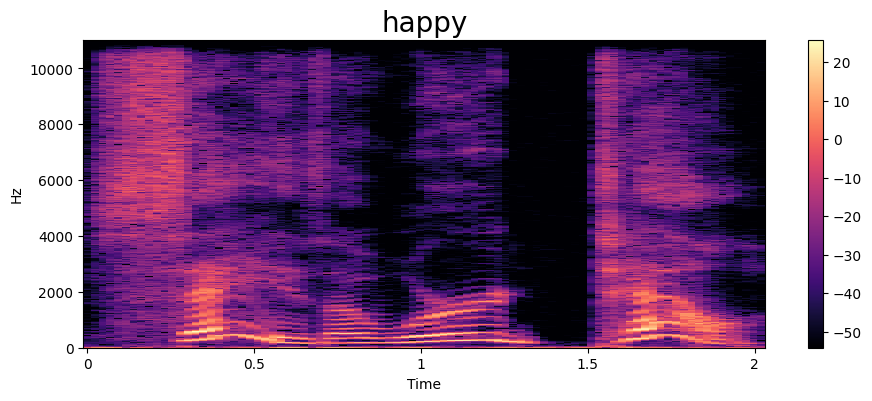

In [20]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [22]:
extract_mfcc(df['speech'][0])

array([-4.0731439e+02,  4.9748074e+01,  5.7831345e+00,  2.3489536e+01,
       -1.6286943e+01,  6.3535156e+00,  5.2845674e+00, -1.3107791e+01,
       -2.1893954e+00, -4.3333354e+00, -1.5758261e+01,  8.2725220e+00,
       -1.0061387e+01,  9.0165834e+00,  2.2428710e+00, -3.9664700e+00,
        1.4915417e+00, -2.3247650e+00, -7.1739087e+00, -5.2895230e-01,
       -5.7433324e+00,  1.4678088e+00, -3.3766797e+00,  1.7851204e+00,
        1.0805033e+00, -1.5917822e+00,  1.0238595e-01,  2.5498478e+00,
        3.2533848e+00,  9.4074154e+00,  8.0459986e+00,  1.1770781e+01,
        8.5951719e+00,  1.1010858e+01,  6.8814301e+00,  8.0331898e+00,
        9.1714853e-01,  9.4907749e-01,  9.0259659e-01,  1.7638899e+00],
      dtype=float32)

In [23]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X_mfcc

,speech
0,"[-407.3144, 49.748074, 5.7831345, 23.489536, -..."
1,"[-342.38736, 33.039253, -10.382474, 26.995157,..."
2,"[-376.36966, 67.50204, -3.9659445, 14.629604, ..."
3,"[-335.2685, 83.16188, -1.6511906, 8.874085, -3..."
4,"[-359.41626, 55.833916, -0.92791736, 18.74913,..."
...,...
2795,"[-288.68677, 40.154762, -14.980737, 24.782038,..."
2796,"[-234.78735, 54.917706, -11.131455, 14.779, -5..."
2797,"[-271.23245, 21.541859, -18.678143, 10.60208, ..."
2798,"[-318.57578, 52.331272, -30.931461, 12.884997,..."


In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [26]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [28]:
y = y.toarray()

In [29]:
y.shape

(2800, 7)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.4298 - loss: 1.5013 - val_accuracy: 0.2946 - val_loss: 1.7152
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.8078 - loss: 0.5271 - val_accuracy: 0.3911 - val_loss: 1.8761
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9282 - loss: 0.2427 - val_accuracy: 0.5839 - val_loss: 1.3392
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9330 - loss: 0.1990 - val_accuracy: 0.6196 - val_loss: 1.3117
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9614 - loss: 0.1423 - val_accuracy: 0.5250 - val_loss: 1.5810
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9662 - loss: 0.1262 - val_accuracy: 0.5821 - val_loss: 1.4462
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9715 - loss: 0.1146 - val_accuracy: 0.5571 - val_loss: 1.8834
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.9617 - loss: 0.1315 - val_accurac

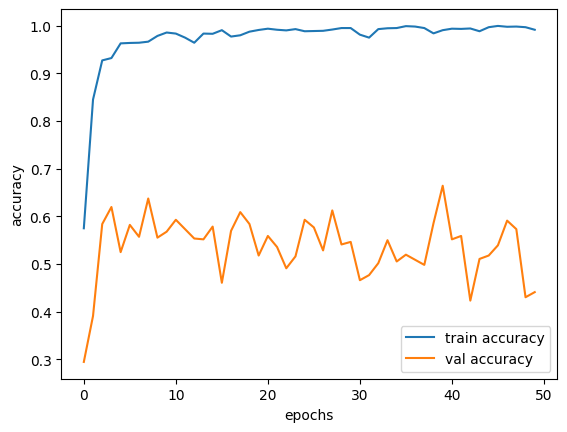

In [32]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

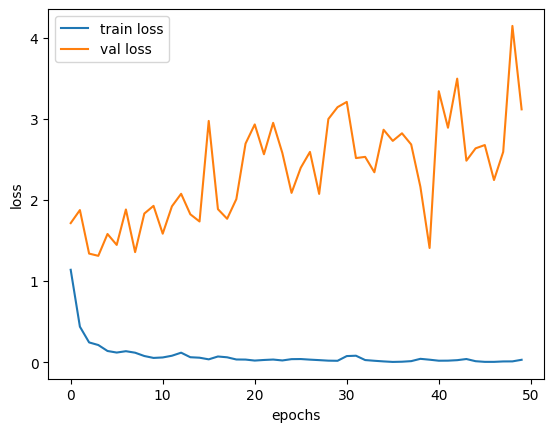

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()